In [7]:
import numpy as np
import pandas as pd
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn import tree
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
data = 'data/heart.csv'
df = pd.read_csv(data)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [9]:
X = df.drop(columns=['target'])
y = df['target']
print(X.shape)
print(y.shape)

(303, 13)
(303,)


In [10]:
x_train,x_test,y_train,y_test = train_test_split(X,y, test_size = 0.3, stratify=y)
print(x_train.shape)
print(x_test.shape)

(212, 13)
(91, 13)


In [11]:
model = tree.DecisionTreeClassifier(random_state=0)
model.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0)

In [12]:
trained = model.predict(x_train)
predicted = model.predict(x_test)

print ('Train accuracy: ', accuracy_score(y_train, trained))
print ('Test accuracy: ', accuracy_score(y_test, predicted))

Train accuracy:  1.0
Test accuracy:  0.7142857142857143


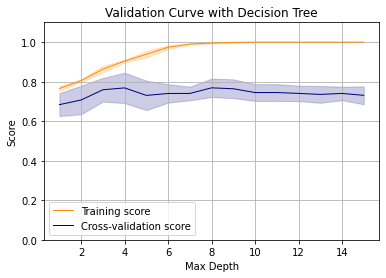

In [17]:
param_range = np.arange(1, 16,1)
train_scores, test_scores = validation_curve(
    tree.DecisionTreeClassifier(),
    x_train,
    y_train,
    param_name="max_depth",
    param_range=param_range,
    scoring="accuracy",
    n_jobs=2,
)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with Decision Tree")
plt.xlabel('Max Depth')
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 1

plt.plot(
    param_range, train_scores_mean, label="Training score", color="darkorange", lw=lw
)
#plt.semilogx(
    #param_range, train_scores_mean, label="Training score", color="darkorange", lw=lw
#)
plt.fill_between(
    param_range,
    train_scores_mean - train_scores_std,
    train_scores_mean + train_scores_std,
    alpha=0.2,
    color="darkorange",
    lw=lw,
)

plt.plot(
    param_range, test_scores_mean, label="Cross-validation score", color="navy", lw=lw
)
#plt.semilogx(
    #param_range, test_scores_mean, label="Cross-validation score", color="navy", lw=lw
#)
plt.fill_between(
    param_range,
    test_scores_mean - test_scores_std,
    test_scores_mean + test_scores_std,
    alpha=0.2,
    color="navy",
    lw=lw,
)
plt.legend(loc="best")
plt.grid()
plt.show()

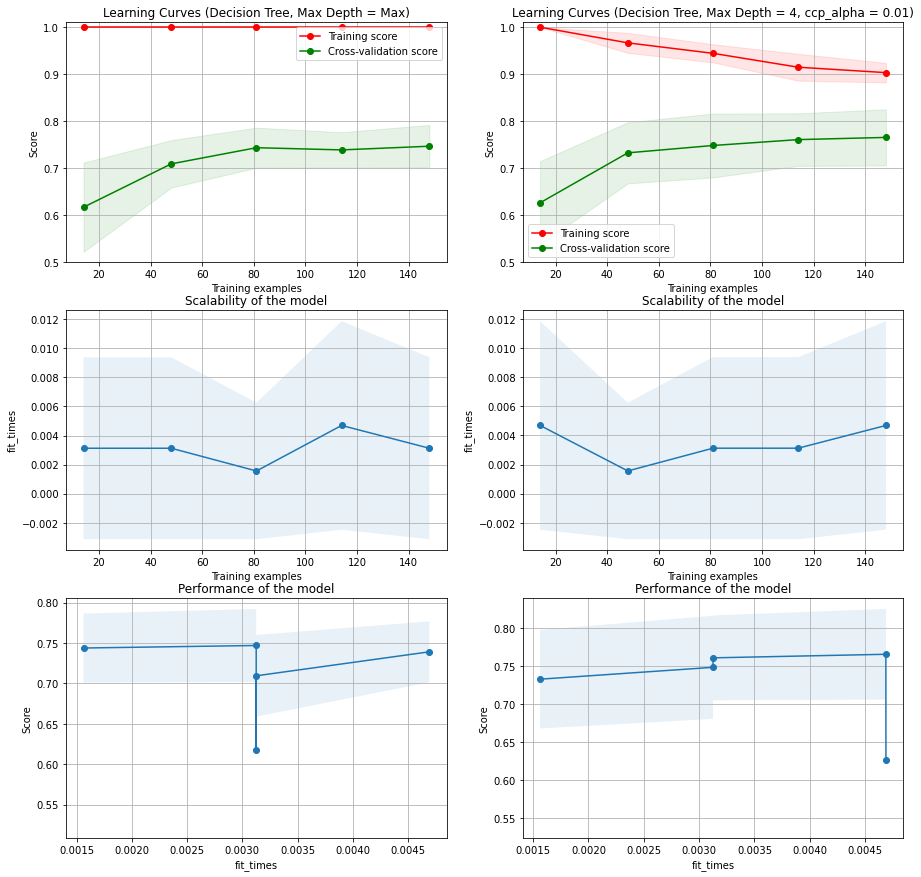

In [22]:
#predicted = model.predict(x_test)
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(
    estimator,
    title,
    x_train,
    y_train,
    axes=None,
    ylim=None,
    cv=None,
    n_jobs=None,
    train_sizes=np.linspace(0.1, 1.0, 5),
):
    
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        estimator,
        x_train,
        y_train,
        cv=cv,
        n_jobs=n_jobs,
        train_sizes=train_sizes,
        return_times=True,
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    axes[0].fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    axes[0].plot(
        train_sizes, train_scores_mean, "o-", color="r", label="Training score"
    )
    axes[0].plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, "o-")
    axes[1].fill_between(
        train_sizes,
        fit_times_mean - fit_times_std,
        fit_times_mean + fit_times_std,
        alpha=0.1,
    )
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    fit_time_argsort = fit_times_mean.argsort()
    fit_time_sorted = fit_times_mean[fit_time_argsort]
    test_scores_mean_sorted = test_scores_mean[fit_time_argsort]
    test_scores_std_sorted = test_scores_std[fit_time_argsort]
    axes[2].grid()
    axes[2].plot(fit_time_sorted, test_scores_mean_sorted, "o-")
    axes[2].fill_between(
        fit_time_sorted,
        test_scores_mean_sorted - test_scores_std_sorted,
        test_scores_mean_sorted + test_scores_std_sorted,
        alpha=0.1,
    )
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt


fig, axes = plt.subplots(3, 2, figsize=(15, 15))


title = r"Learning Curves (Decision Tree, Max Depth = Max)"
# Cross validation with 10 iterations to get smoother mean test and train
# score curves, each time with 30% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=0)

estimator = tree.DecisionTreeClassifier()
plot_learning_curve(
    estimator, title, x_train, y_train, axes=axes[:, 0], ylim=(0.5, 1.01), cv=cv, n_jobs=4
)

title = r"Learning Curves (Decision Tree, Max Depth = 4, ccp_alpha = 0.01)"
cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=0)
estimator = tree.DecisionTreeClassifier(max_depth = 4, ccp_alpha = 0.01)
plot_learning_curve(
    estimator, title, x_train, y_train, axes=axes[:, 1], ylim=(0.5, 1.01), cv=cv, n_jobs=4
)

plt.show()

In [19]:
model_tuned = tree.DecisionTreeClassifier(max_depth = 4, ccp_alpha = 0.01)
model_tuned.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.01, max_depth=3)

In [20]:
from sklearn.metrics import classification_report
predicted_tuned = model_tuned.predict(x_test)
report = classification_report(y_test, predicted_tuned)
print (accuracy_score(y_test, predicted_tuned))
print(report)

0.7582417582417582
              precision    recall  f1-score   support

           0       0.81      0.61      0.69        41
           1       0.73      0.88      0.80        50

    accuracy                           0.76        91
   macro avg       0.77      0.74      0.75        91
weighted avg       0.77      0.76      0.75        91

